# Imports

In [1]:
import json
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from s4hci.utils.data_handling import load_adi_data, save_as_fits
from s4hci.models.psf_subtraction import S4
from s4hci.models.noise import S4Noise

# Load the data

In [42]:
dataset_hdf5_file_old = "/fast/mbonse/s4/30_data/old_datasets/EpsEri_0100_C-0656-A.hdf5"
dataset_hdf5_file_new = "/fast/mbonse/s4/30_data/HD22049_310_0100_C-0656_A_.hdf5"

#dataset_hdf5_file_old = "/fast/mbonse/s4/30_data/old_datasets/EpsEri_199_C-0065-C_2017-10-31.hdf5"
#dataset_hdf5_file_new = "/fast/mbonse/s4/30_data/HD22049_304_199_C-0065_C_.hdf5"

s4_work_dir = "/fast/mbonse/s4/70_results/03_contrast_grid/explain_pattern/"

In [43]:
science_data_old, raw_angles_old, _ = \
    load_adi_data(
        hdf5_dataset=dataset_hdf5_file_old,
        data_tag="13_object_final",
        psf_template_tag="10_psf",
        para_tag="header_13_object_final/PARANG")

science_data_new, raw_angles_new, _ = \
    load_adi_data(
        hdf5_dataset=dataset_hdf5_file_new,
        data_tag="object",
        psf_template_tag="psf_template",
        para_tag="header_object/PARANG")

In [44]:
science_data_new = science_data_new[:, 17:-17, 17:-17]#.shape

In [45]:
science_data_old.shape

(69331, 107, 107)

In [46]:
science_data_new.shape

(60677, 107, 107)

# How much did the normalization frames change?

In [47]:
new_mean = np.mean(science_data_new, axis=0)
old_mean = np.mean(science_data_old, axis=0)

new_std = np.std(science_data_new, axis=0)
old_std = np.std(science_data_old, axis=0)

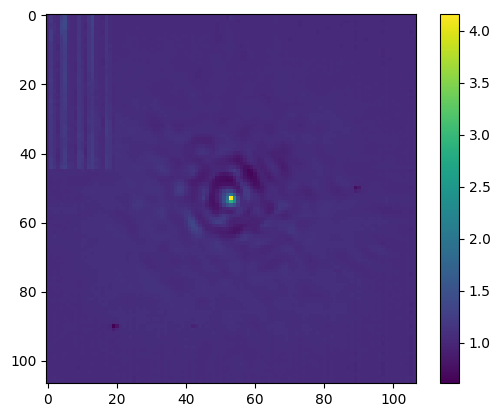

In [48]:
plt.imshow(1 / np.abs(new_std / old_std))
plt.colorbar()

# Try a robust normalization

In [49]:
from scipy.stats import iqr

In [51]:
iqr_frame = iqr(science_data_new, axis=0, scale=1.349)

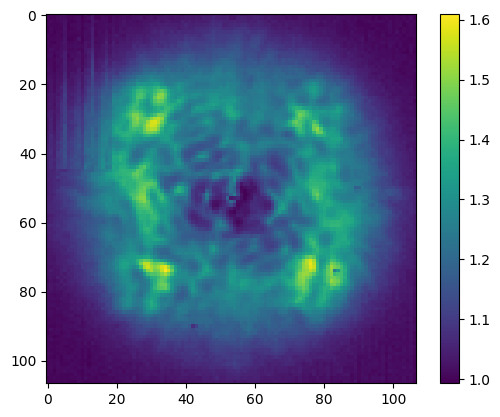

In [52]:
plt.imshow(1 / (iqr_frame / new_std))
plt.colorbar()